### Chicago Taxi Trips Analysis

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import bokeh
import geopy as gp
import pygeohash as gh
from IPython.display import display 
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# import cleaned Taxi Trip data from CSV into DataFrame
%run ./ChicagoRideHailing_DataCleaning.ipynb
df =  df_clean


,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,02fc5d8c3e8525a49b7514bd6c2b3301c2d6aa79,7e179f8ef66ae99ec2d1ec89224e0b7ee5469fe5627f6d...,2021-01-01,2021-01-01 00:15:00,"1,021.00",3.17,nan,nan,nan,4.00,...,0.00,13.25,Cash,Flash Cab,nan,nan,NaN,41.98,-87.69,POINT (-87.6875155152 41.9751709433)
1,33eb5c7a1439ac1e3ec6d1520e21db8137d1d11b,2c508057a94474215bdea7b101edad0dc911ef61bb99e6...,2021-01-01,2021-01-01 15:30:00,"56,047.00",7.10,nan,nan,56.00,nan,...,6.50,27.00,Cash,Flash Cab,41.79,-87.77,POINT (-87.7696154528 41.7925923603),nan,nan,NaN
2,4bcfcfa78f372b705214ee2cba9c765ad6ba5161,31261f6e7fc645eff98c7964c7ea71a0ea7e387a6bd7f8...,2021-01-01,2021-01-01 00:00:00,120.00,0.10,nan,nan,8.00,8.00,...,1.00,4.50,Cash,Taxi Affiliation Services,41.90,-87.63,POINT (-87.6333080367 41.899602111),41.90,-87.63,POINT (-87.6333080367 41.899602111)
3,655bbd9bcb0a78ee003e304ebbe350b21cdd7083,f6138aa35e1fb074eb79fbe29f512b6153dca3593d8cd2...,2021-01-01,2021-01-01 00:00:00,0.00,0.00,nan,nan,67.00,67.00,...,0.00,3.25,Cash,"Taxicab Insurance Agency, LLC",41.78,-87.67,POINT (-87.6665962653 41.7759288274),41.78,-87.67,POINT (-87.6665962653 41.7759288274)
4,7b7b8108de94a518607068a7369ceea1ab2ae924,2c508057a94474215bdea7b101edad0dc911ef61bb99e6...,2021-01-01,2021-01-01 00:00:00,50.00,0.38,nan,nan,60.00,31.00,...,0.00,4.00,Cash,Flash Cab,41.84,-87.65,POINT (-87.6487879519 41.8361501547),41.85,-87.67,POINT (-87.667569312 41.8502663663)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148174 entries, 0 to 2148173
Data columns (total 23 columns):
Trip ID                       object
Taxi ID                       object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                  object
Company                       object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location      object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location    object
dtype

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,"2,147,227.00","2,147,899.00","478,730.00","466,153.00","1,977,168.00","1,875,194.00","2,147,950.00","2,147,950.00","2,147,950.00","2,147,950.00","2,147,950.00","1,977,826.00","1,977,826.00","1,883,736.00","1,883,736.00"
mean,"1,150.88",5.72,"17,031,467,870.40","17,031,391,470.96",32.29,25.85,21.07,1.77,0.00,2.04,24.98,41.89,-87.69,41.89,-87.66
std,"1,970.72",11.02,"375,065.14","338,968.19",25.21,21.02,74.00,3.54,0.57,31.43,81.27,0.07,0.10,0.06,0.07
min,0.00,0.00,"17,031,010,100.00","17,031,010,100.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,41.66,-87.91,41.66,-87.91
25%,420.00,0.65,"17,031,081,500.00","17,031,081,403.00",8.00,8.00,7.25,0.00,0.00,0.00,8.75,41.87,-87.70,41.87,-87.66
50%,840.00,2.45,"17,031,320,100.00","17,031,320,100.00",28.00,24.00,14.00,0.00,0.00,0.00,16.50,41.90,-87.64,41.90,-87.64
75%,"1,560.00",9.83,"17,031,843,100.00","17,031,838,200.00",49.00,33.00,30.25,2.05,0.00,1.00,32.00,41.94,-87.63,41.92,-87.63
max,"86,382.00","3,430.53","17,031,980,100.00","17,031,980,100.00",77.00,77.00,"9,900.25",350.00,741.00,"8,255.56","9,975.25",42.02,-87.53,42.02,-87.53


Trip Seconds 99th =  4080.0 , 100th =  86382.0
Trip Miles 99th =  27.3 , 100th =  3430.53
Trip Total 99th =  94.3 , 100th =  9975.25


,Trip ID,Taxi ID,Payment Type,Company,Pickup Centroid Location,Dropoff Centroid Location
count,2148174,2148009,2148174,2148174,1977826,1883736
unique,2148174,1873,8,37,481,551
top,3874be1d60afd18c1796929e42059b4a8764e83e,8a8b7ea6cf38ddad449d266d38a1c10cf326e0e06f3e7c...,Cash,Flash Cab,POINT (-87.6333080367 41.899602111),POINT (-87.6333080367 41.899602111)
freq,1,6677,918532,658613,300527,259059


Trip ID                             0
Taxi ID                           165
Trip Start Timestamp                0
Trip End Timestamp                406
Trip Seconds                      947
Trip Miles                        275
Pickup Census Tract           1669444
Dropoff Census Tract          1682021
Pickup Community Area          171006
Dropoff Community Area         272980
Fare                              224
Tips                              224
Tolls                             224
Extras                            224
Trip Total                        224
Payment Type                        0
Company                             0
Pickup Centroid Latitude       170348
Pickup Centroid Longitude      170348
Pickup Centroid Location       170348
Dropoff Centroid Latitude      264438
Dropoff Centroid Longitude     264438
Dropoff Centroid  Location     264438
dtype: int64

['Cash',
 'Credit Card',
 'Dispute',
 'Mobile',
 'No Charge',
 'Prcard',
 'Prepaid',
 'Unknown']

Cash           918532
Credit Card    633457
Prcard         261755
Unknown        210754
Mobile         120698
Dispute          1946
No Charge        1028
Prepaid             4
Name: Payment Type, dtype: int64

['24 Seven Taxi',
 '2733 - 74600 Benny Jona',
 '3011 - 66308 JBL Cab Inc.',
 '312 Medallion Management Corp',
 '3556 - 36214 RC Andrews Cab',
 '3591 - 63480 Chuks Cab',
 '3620 - 52292 David K. Cab Corp.',
 '4523 - 79481 Hazel Transit Inc',
 '4623 - 27290 Jay Kim',
 '4732 - Maude Lamy',
 '4787 - 56058 Reny Cab Co',
 '5062 - 34841 Sam Mestas',
 '6743 - 78771 Luhak Corp',
 'Blue Ribbon Taxi Association Inc.',
 'Chicago Carriage Cab Corp',
 'Chicago Independents',
 'Chicago Taxicab',
 'Choice Taxi Association',
 'City Service',
 'Flash Cab',
 'Globe Taxi',
 'KOAM Taxi Association',
 'Medallion Leasin',
 'Metro Jet Cab Association Inc.',
 'Metro Jet Taxi A.',
 'Metro Jet Taxi Ass',
 'Patriot Taxi Dba Peace Taxi Associat',
 'Petani Cab Corp',
 'Setare Inc',
 'Star North Management LLC',
 'Suburban Dispatch LLC',
 'Sun Taxi',
 'Taxi Affiliation Services',
 'Taxicab Insurance Agency, LLC',
 'Top Cab',
 'Top Cab Affiliation',
 'U Taxicab']

Flash Cab                               658613
Taxi Affiliation Services               614381
Medallion Leasin                        130191
Taxicab Insurance Agency, LLC           116418
Sun Taxi                                115100
City Service                             97900
Top Cab Affiliation                      69014
Blue Ribbon Taxi Association Inc.        61534
Chicago Independents                     58197
Star North Management LLC                57376
Globe Taxi                               48758
U Taxicab                                37928
Patriot Taxi Dba Peace Taxi Associat     16888
24 Seven Taxi                            15903
Chicago Taxicab                          12645
Choice Taxi Association                  10515
Setare Inc                                5817
312 Medallion Management Corp             4570
KOAM Taxi Association                     4250
Petani Cab Corp                           2305
3591 - 63480 Chuks Cab                    1473
3556 - 36214 

Initial number of rows : 2148174
Final number of rows : 1797573


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797573 entries, 0 to 2148172
Data columns (total 23 columns):
Trip ID                       object
Taxi ID                       object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                  object
Company                       object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location      object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location    object
dtype

#### Summary


In [4]:
plt.rcParams['font.size'] = '11'

In [5]:
print("Total Trips: ",len(df['Trip ID'].unique()))
print("Total Taxis: ",len(df['Taxi ID'].unique()))

Total Trips:  1797573
Total Taxis:  1638


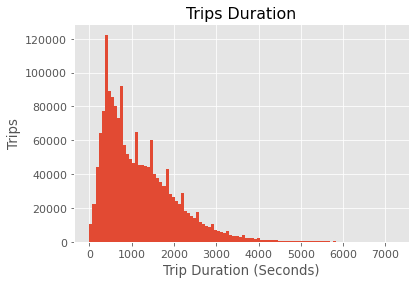

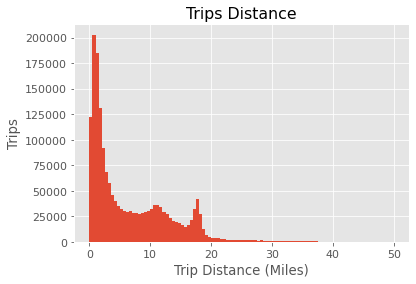

In [6]:
# distribution of trip duration
fig, ax = plt.subplots()

ax.set_xlabel('Trip Duration (Seconds)')
ax.set_ylabel('Trips')

ax.set_title('Trips Duration')

ax.hist(df['Trip Seconds'],bins = 100,range = [0,7200])
plt.show()

# distribution of trip distance
fig, ax = plt.subplots()

ax.set_xlabel('Trip Distance (Miles)')
ax.set_ylabel('Trips')

ax.set_title('Trips Distance')

ax.hist(df['Trip Miles'],bins = 100,range = [0,50])
plt.show()

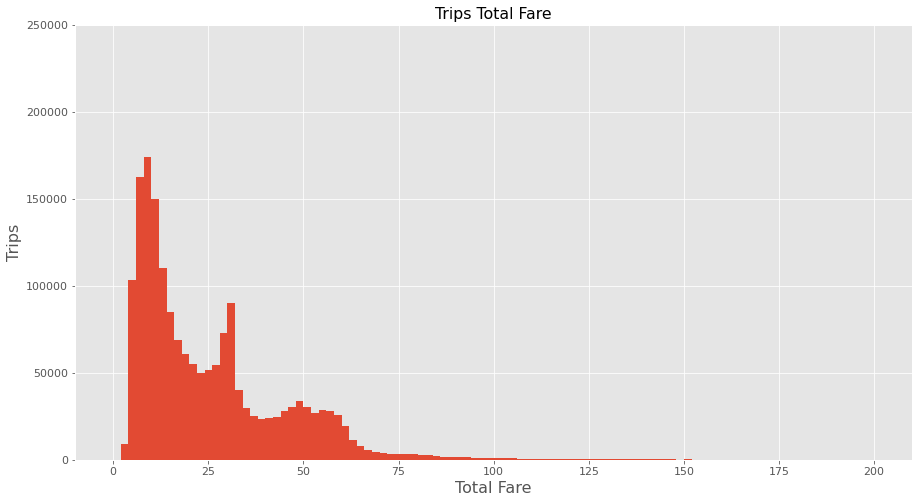

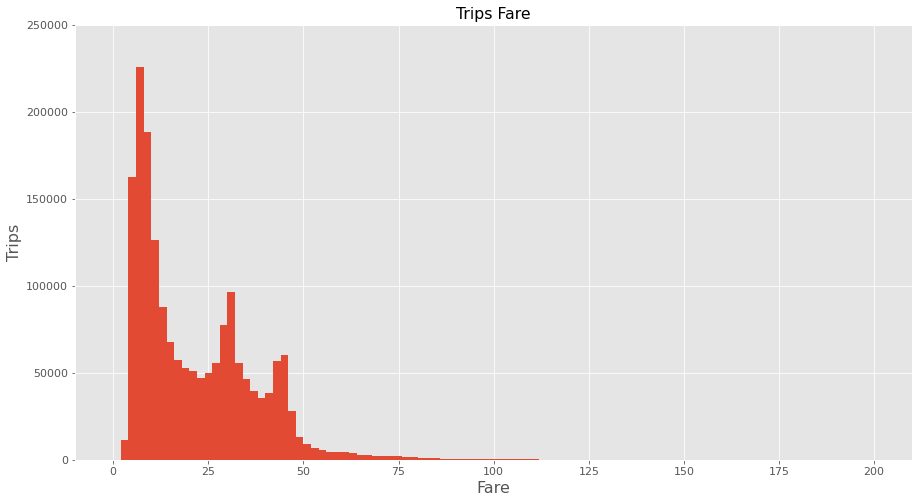

In [7]:
ymin = 0
ymax = 250000
# distribution of total fares
fig, ax = plt.subplots()

ax.set_xlabel('Total Fare', fontsize = '16')
ax.set_ylabel('Trips', fontsize = '16')

ax.set_title('Trips Total Fare')
fig.set_size_inches(15,8)

ax.set_ylim([ymin,ymax])
ax.hist(df['Trip Total'],bins = 100,range = [0,200], stacked=True)
plt.show()

# distribution of fare
fig, ax = plt.subplots()

ax.set_xlabel('Fare', fontsize = '16')
ax.set_ylabel('Trips', fontsize = '16')

ax.set_title('Trips Fare')
fig.set_size_inches(15,8)
ax.set_ylim([ymin,ymax])
ax.hist(df['Fare'],bins = 100,range = [0,200], stacked=True)
plt.show()

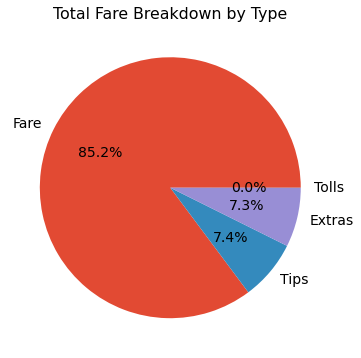

,Dollars
Fare,"38,920,435.25"
Tips,"3,400,562.10"
Extras,"3,351,472.24"
Tolls,"6,882.94"


In [8]:
# breakdown of charges
df_charges = df[['Fare','Tips','Tolls','Extras']].sum().sort_values(ascending = False)

fig, ax = plt.subplots()
ax.set_title('Total Fare Breakdown by Type')

data_charges_piechart = df_charges
ax.pie(data_charges_piechart , labels = data_charges_piechart.index, autopct='%1.1f%%',  textprops={'fontsize': 14})
fig.set_size_inches(6,6)

plt.show()

display(pd.DataFrame(df_charges, columns = ['Dollars']))

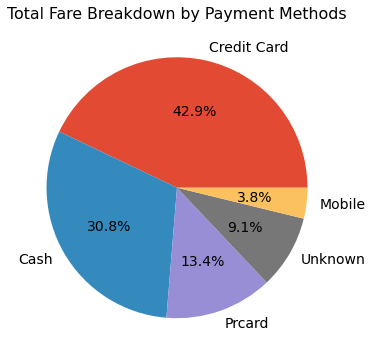

,Trip Total
Payment Type,
Credit Card,"19,673,247.96"
Cash,"14,109,472.48"
Prcard,"6,122,567.38"
Unknown,"4,182,655.65"
Mobile,"1,747,588.97"
Dispute,"36,202.05"
No Charge,"20,362.12"


In [9]:
# breakdown of payment method
fig, ax = plt.subplots()
df_payment = df.groupby(['Payment Type']).sum()['Trip Total']
df_payment = df_payment.sort_values(ascending = False)
ax.set_title('Total Fare Breakdown by Payment Methods')

data_piechart = df_payment.drop(labels= ['No Charge','Dispute'])
ax.pie(data_piechart , labels = data_piechart .index,autopct='%1.1f%%', textprops={'fontsize': 14})
fig.set_size_inches(6,6)
plt.show()

display(pd.DataFrame(df_payment))

In [10]:
## add hour and day of week columns
df['Trip Start Hour'] = df['Trip Start Timestamp'].dt.hour
df['Trip Day of Week'] = df['Trip Start Timestamp'].dt.dayofweek

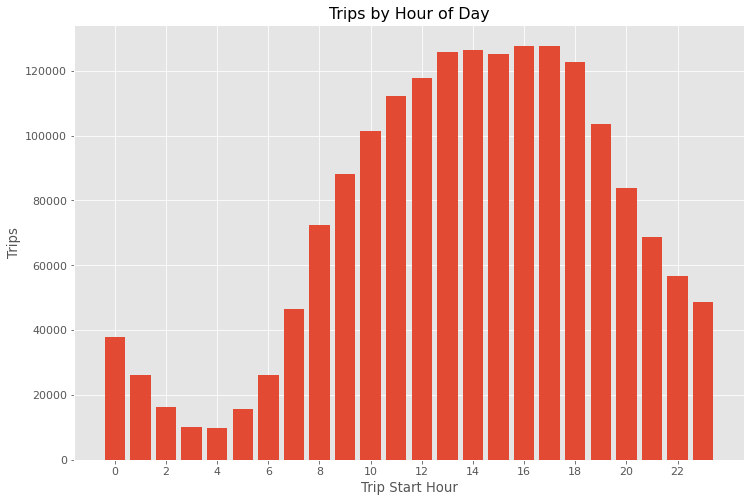

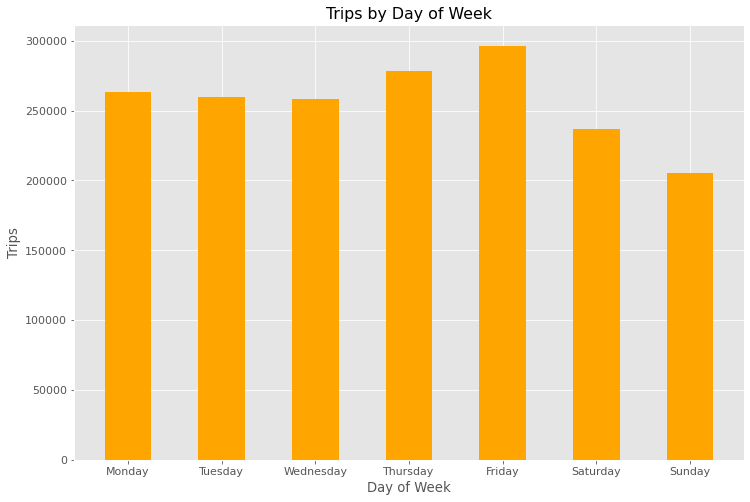

In [11]:
# hour and day analysis
def plotHourAndDayTrends(df_toplot):
    # distribution of trips within a day; by hour
    fig, ax = plt.subplots()
    fig.set_size_inches(12,8)

    ax.set_xlabel('Trip Start Hour')
    ax.set_ylabel('Trips')
    ax.set_title('Trips by Hour of Day')
    ax.set_xticks( range(0,24,2))

    ax.bar( range(0,24),df_toplot.groupby(['Trip Start Hour']).size())

    plt.show()

    
    # distribution of trips based on day of the week    
    dayofweek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

    fig, ax = plt.subplots()
    fig.set_size_inches(12,8)

    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Trips')
    ax.set_title('Trips by Day of Week')
    
    data_dayofweek = df_toplot.groupby(['Trip Day of Week']).size()

    ax.bar(range(7), data_dayofweek, width = 0.5, color = 'orange')
    ax.set_xticks(range(7))
    ax.set_xticklabels(dayofweek)
    plt.show()
    
plotHourAndDayTrends(df)

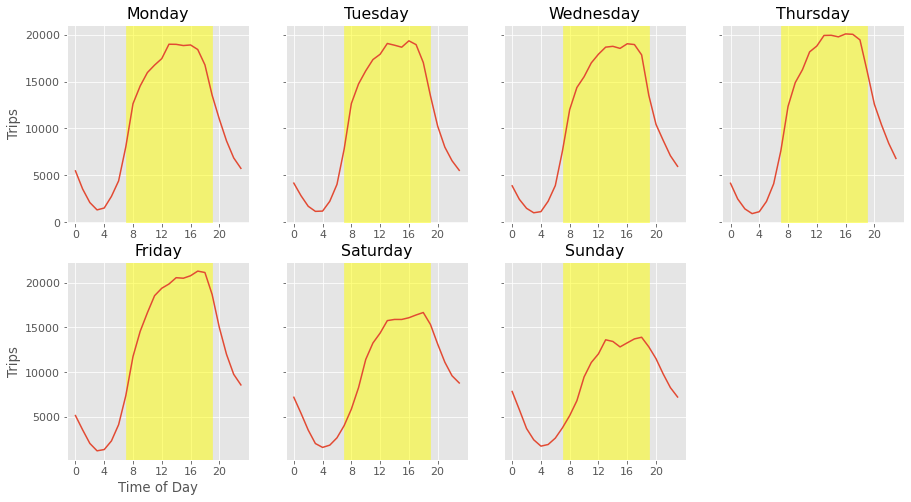

In [12]:
## trip by time of day
plot_data = df.groupby(['Trip Day of Week','Trip Start Hour']).size()
fig, axs = plt.subplots(2,4,sharey='row', figsize=(15,8))
axs[-1, -1].axis('off')
dayofweek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

axs[0,0].set_ylabel('Trips')
axs[1,0].set_ylabel('Trips')
axs[1,0].set_xlabel('Time of Day')
day = 0
for r in range (2):
    for c in range (4):
        if(day < 7): 
            axs[r,c].set_title(dayofweek[day])
            axs[r,c].plot(plot_data[day])
            axs[r,c].set_xticks( range(0,24,4))
            axs[r,c].axvspan(7, 19,color='yellow', alpha=0.5 )
            day = day + 1
plt.show()


### Spatial Analysis

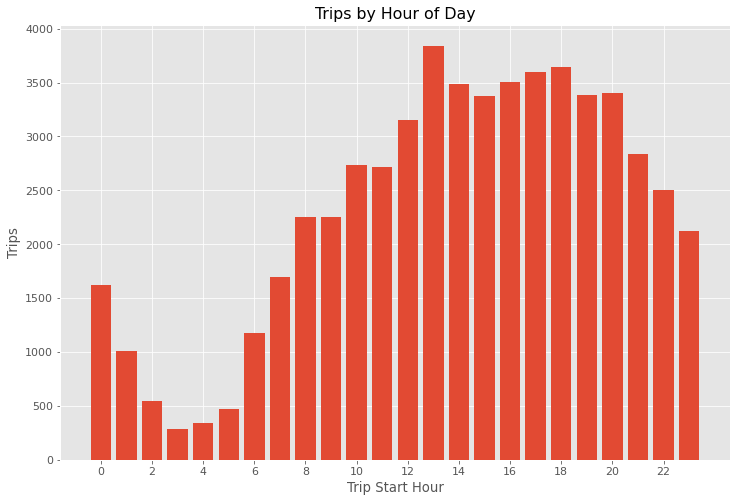

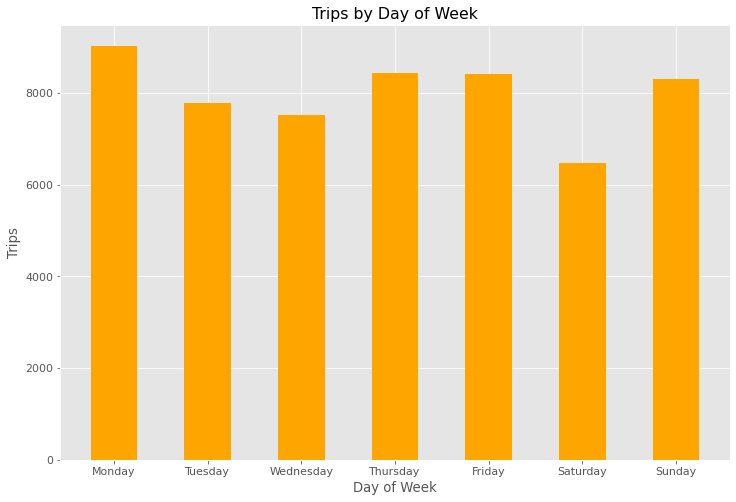

In [13]:
## into city
df_intocity = df[df['Pickup Centroid Location'].isnull() & df['Dropoff Centroid  Location'].notnull()]

plotHourAndDayTrends(df_intocity)

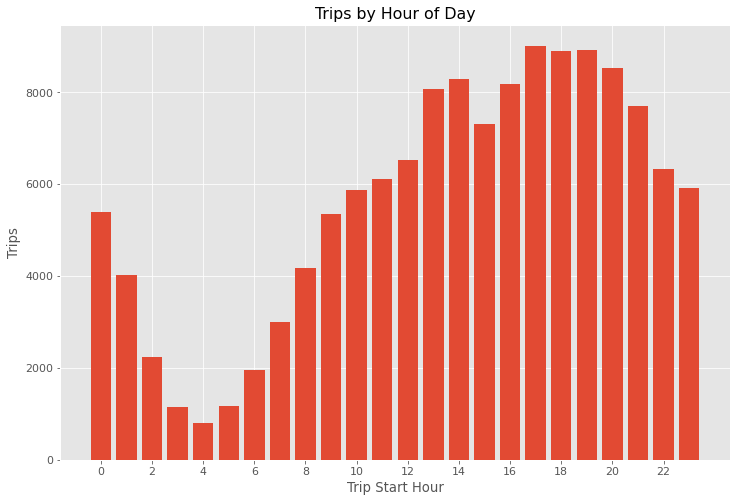

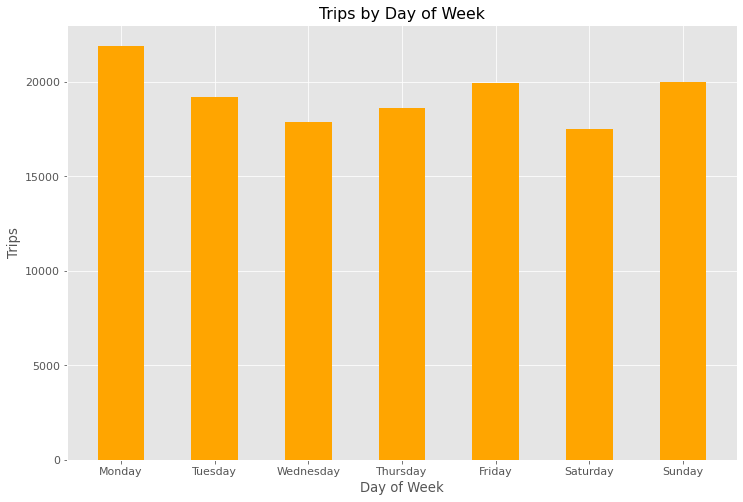

In [14]:
## trip out of city

df_outofcity = df[df['Pickup Centroid Location'].notnull() & df['Dropoff Centroid  Location'].isnull()]

plotHourAndDayTrends(df_outofcity)

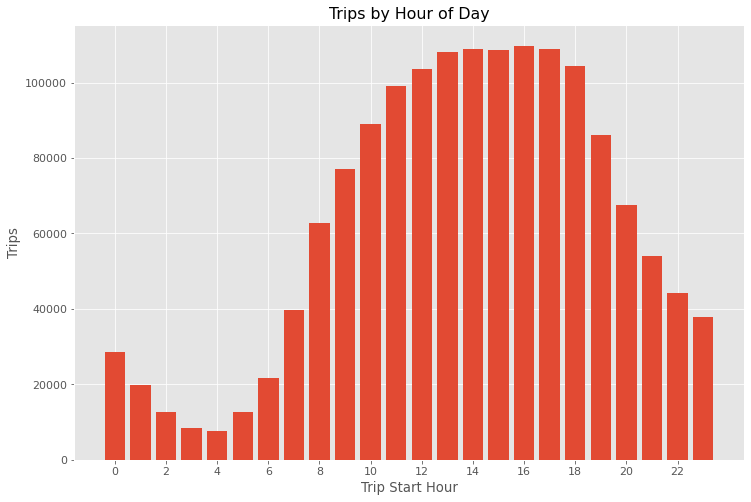

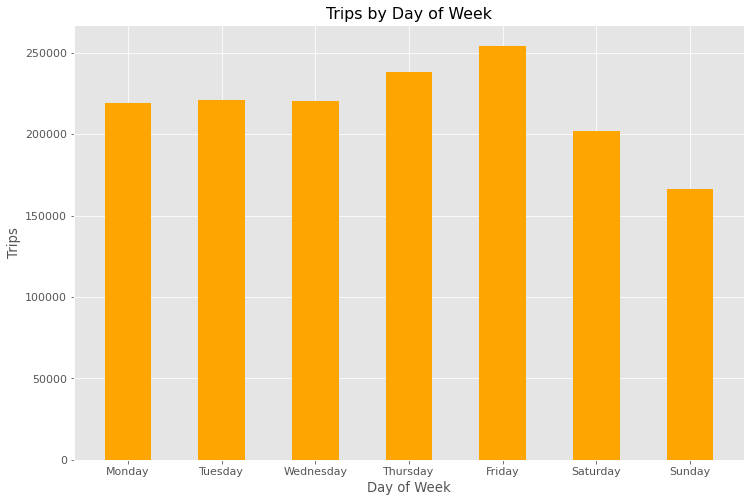

In [15]:
## trip within city

df_withincity = df[df['Pickup Centroid Location'].notnull() & df['Dropoff Centroid  Location'].notnull()]

plotHourAndDayTrends(df_withincity)

In [16]:
df['Pickup Centroid Location'].describe()

count                                 1656469
unique                                    357
top       POINT (-87.6333080367 41.899602111)
freq                                   249441
Name: Pickup Centroid Location, dtype: object

In [17]:
df['Dropoff Centroid  Location'].describe()

count                                 1577433
unique                                    485
top       POINT (-87.6333080367 41.899602111)
freq                                   214676
Name: Dropoff Centroid  Location, dtype: object

In [18]:
df.groupby(['Pickup Centroid Location']).size().sort_values(ascending = False)

Pickup Centroid Location
POINT (-87.6333080367 41.899602111)     249441
POINT (-87.913624596 41.9802643146)     171973
POINT (-87.6635175498 41.874005383)     107283
POINT (-87.6251921424 41.8788655841)    103813
POINT (-87.9030396611 41.9790708201)     85620
                                         ...  
POINT (-87.6517530558 41.6813147793)         1
POINT (-87.652031202 41.6958343746)          1
POINT (-87.6545378676 41.980606166)          1
POINT (-87.701802904 42.0008748252)          1
POINT (-87.6558149022 41.9955129914)         1
Length: 357, dtype: int64

In [19]:
df.groupby(['Dropoff Centroid  Location']).size().sort_values(ascending = False)

Dropoff Centroid  Location
POINT (-87.6333080367 41.899602111)     214676
POINT (-87.6635175498 41.874005383)      97814
POINT (-87.6559981815 41.9442266014)     85265
POINT (-87.6251921424 41.8788655841)     78844
POINT (-87.6494887289 41.9226862843)     65577
                                         ...  
POINT (-87.7452828446 41.7966403342)         1
POINT (-87.7509798603 41.9195645564)         1
POINT (-87.7516489576 41.9351139349)         1
POINT (-87.6295663156 41.7275849467)         1
POINT (-87.6616429039 41.9490605256)         1
Length: 485, dtype: int64

In [20]:
print("Lat min and Long min:", df['Pickup Centroid Latitude'].min(),',' ,df['Pickup Centroid Longitude'].min() )
print("Lat max and Long max:",df['Pickup Centroid Latitude'].max(),',',df['Pickup Centroid Longitude'].max() )
## dropoff
print("dropoff")
print("Lat min and max:", df['Dropoff Centroid Latitude'].min() ,df['Dropoff Centroid Latitude'].max() )
print("Long min and max:",df['Dropoff Centroid Longitude'].min(),df['Dropoff Centroid Longitude'].max() )

Lat min and Long min: 41.660136051 , -87.913624596
Lat max and Long max: 42.021223593 , -87.53490290100001
dropoff
Lat min and max: 41.660136051 42.021223593
Long min and max: -87.913624596 -87.53490290100001


No handles with labels found to put in legend.


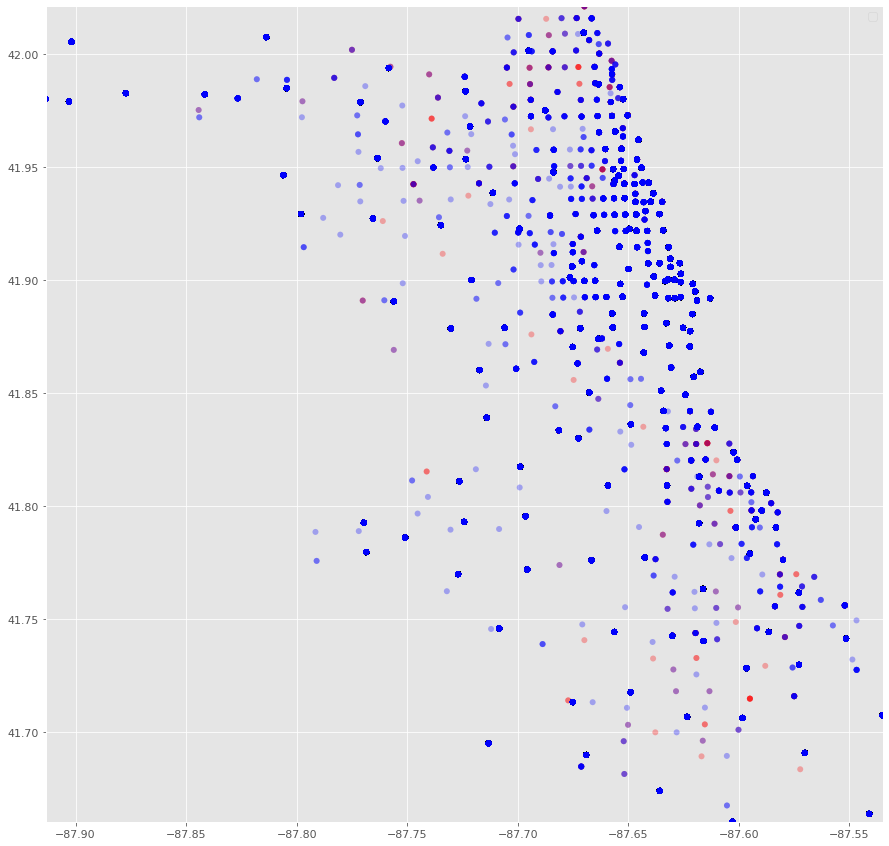

In [21]:
fix, ax = plt.subplots(figsize = (15,15))
ax.set_ylim([df['Pickup Centroid Latitude'].min(),df['Pickup Centroid Latitude'].max()])
ax.set_xlim([df['Pickup Centroid Longitude'].min(),df['Pickup Centroid Longitude'].max()])

ax.scatter(x = df['Pickup Centroid Longitude'], y = df['Pickup Centroid Latitude'], color = 'red', alpha = 0.3, edgecolors = 'none')
ax.scatter(x = df['Dropoff Centroid Longitude'], y = df['Dropoff Centroid Latitude'] , color = 'blue', alpha = 0.3, edgecolors = 'none')

ax.legend()

plt.show()

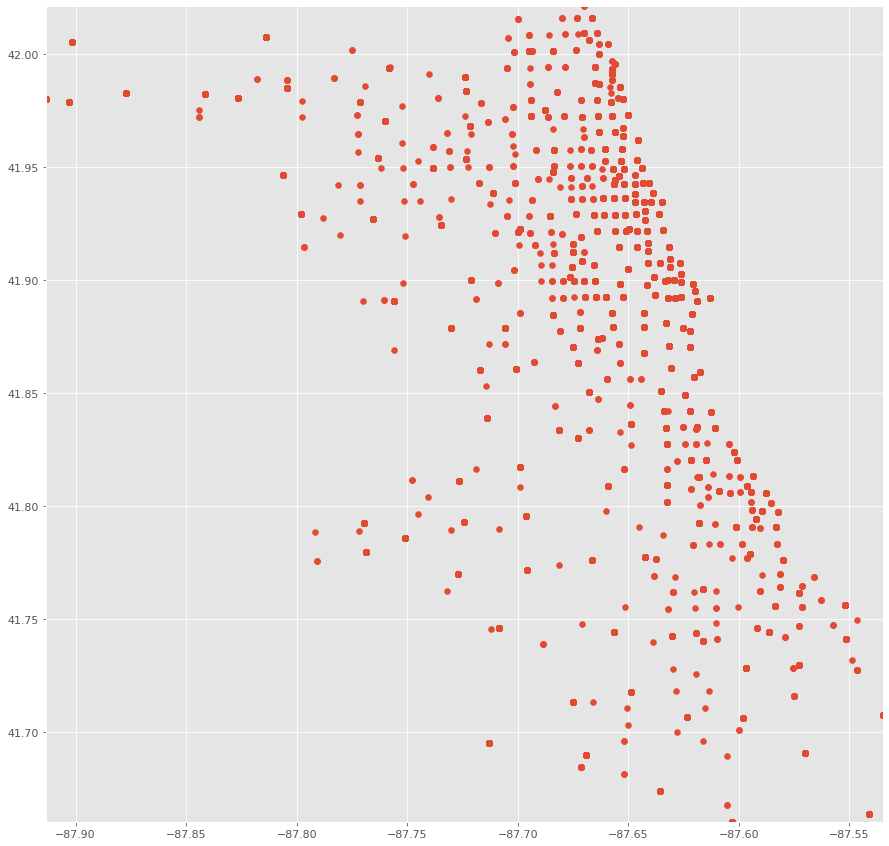

In [22]:
fix, ax = plt.subplots(figsize = (15,15))
ax.set_ylim([df['Pickup Centroid Latitude'].min(),df['Pickup Centroid Latitude'].max()])
ax.set_xlim([df['Pickup Centroid Longitude'].min(),df['Pickup Centroid Longitude'].max()])

ax.scatter(x = df['Dropoff Centroid Longitude'], y = df['Dropoff Centroid Latitude'])

plt.show()

In [90]:
import math

def LatLongToXY(LatLong_Coords):
    lat = LatLong_Coords[0]
    lon = LatLong_Coords[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

circle_size_logbase = 1.45
min_size = 2

df_coordUnique = df[df['Dropoff Centroid  Location'].notnull()].groupby(['Dropoff Centroid Latitude','Dropoff Centroid Longitude']).size().reset_index()
df_coordUnique = df_coordUnique.rename(columns = {0:'count'})
df_coordUnique['Dropoff Coordinate'] = list(zip(df_coordUnique['Dropoff Centroid Latitude'],df_coordUnique['Dropoff Centroid Longitude']))

Dropoff_points = pd.DataFrame()
Dropoff_points['x_coord'] = df_coordUnique['Dropoff Coordinate'].apply(lambda x: LatLongToXY(x)[0])
Dropoff_points['y_coord'] = df_coordUnique['Dropoff Coordinate'].apply(lambda x: LatLongToXY(x)[1])
Dropoff_points['size'] = df_coordUnique['count'].apply(lambda x: math.log(x,circle_size_logbase) + min_size)

df_coordUnique = df[df['Pickup Centroid Location'].notnull()].groupby(['Pickup Centroid Latitude','Pickup Centroid Longitude']).size().reset_index()
df_coordUnique = df_coordUnique.rename(columns = {0:'count'})
df_coordUnique['Pickup Coordinate'] = list(zip(df_coordUnique['Pickup Centroid Latitude'],df_coordUnique['Pickup Centroid Longitude']))

Pickup_points = pd.DataFrame()
Pickup_points['x_coord'] = df_coordUnique['Pickup Coordinate'].apply(lambda x: LatLongToXY(x)[0])
Pickup_points['y_coord'] = df_coordUnique['Pickup Coordinate'].apply(lambda x: LatLongToXY(x)[1])
Pickup_points['size'] = df_coordUnique['count'].apply(lambda x: math.log(x,circle_size_logbase)+ min_size)

In [91]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON, get_provider
tile_provider = get_provider(CARTODBPOSITRON)

p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

p.circle(x = Dropoff_points['x_coord'], 
         y = Dropoff_points['y_coord'], 
         size = Dropoff_points['size'],
         color = 'blue', 
         alpha = 0.3)

p.circle(x = Pickup_points['x_coord'],
         y = Pickup_points['y_coord'],
         size = Pickup_points['size'],
         color = 'red',
         alpha = 0.3)

output_notebook()
show(p)

Loading BokehJS ...

In [169]:
def getTripDF(df_input):
    df_trips = df_input[df_input['Dropoff Centroid  Location'].notnull() & df_input['Pickup Centroid Location'].notnull()].groupby(['Dropoff Centroid Latitude','Dropoff Centroid Longitude','Pickup Centroid Latitude','Pickup Centroid Longitude']).size().reset_index()
    df_trips = df_trips.rename(columns = {0:'count'})
    df_trips.shape[0]

    df_trips['Pickup Coordinate'] = list(zip(df_trips['Pickup Centroid Latitude'],df_trips['Pickup Centroid Longitude']))
    df_trips['Dropoff Coordinate'] = list(zip(df_trips['Dropoff Centroid Latitude'],df_trips['Dropoff Centroid Longitude']))

    df_trips['pickup_x'] = df_trips['Pickup Coordinate'].apply(lambda x: LatLongToXY(x)[0])
    df_trips['pickup_y'] = df_trips['Pickup Coordinate'].apply(lambda x: LatLongToXY(x)[1])
    df_trips['dropoff_x'] = df_trips['Dropoff Coordinate'].apply(lambda x: LatLongToXY(x)[0])
    df_trips['dropoff_y'] = df_trips['Dropoff Coordinate'].apply(lambda x: LatLongToXY(x)[1])
    
    segment_size_logbase = 8
    min_size = 0.05
    df_trips['size'] = df_trips['count'].apply(lambda x: math.log(x,segment_size_logbase) + min_size)

    return df_trips

df_all = getTripDF(df)

In [150]:
p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

p.segment(x0=df_all['pickup_x'], 
          y0=df_all['pickup_y'],
          x1=df_all['dropoff_x'],
          y1=df_all['dropoff_y'],
          color= 'teal', 
          line_width= df_all['size'], 
          alpha = 0.05)

# p.circle(x = Dropoff_points['x_coord'], 
#          y = Dropoff_points['y_coord'], 
#          size = Dropoff_points['size'],
#          color = 'blue', 
#          alpha = 0.3)

# p.circle(x = Pickup_points['x_coord'],
#          y = Pickup_points['y_coord'],
#          size = Pickup_points['size'],
#          color = 'red',
#          alpha = 0.3)

output_notebook()
show(p)

Loading BokehJS ...

In [152]:
df_morning = getTripDF(df[(df['Trip Start Hour'] > 7) & (df['Trip Start Hour'] < 11)])

p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

p.segment(x0=df_morning['pickup_x'], 
          y0=df_morning['pickup_y'],
          x1=df_morning['dropoff_x'],
          y1=df_morning['dropoff_y'],
          color= 'teal', 
          line_width= df_morning['size'], 
          alpha = 0.05)

output_notebook()
show(p)

Loading BokehJS ...

In [156]:
df_noon = getTripDF(df[(df['Trip Start Hour'] > 10) & (df['Trip Start Hour'] < 17)])

p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

p.segment(x0=df_noon['pickup_x'], 
          y0=df_noon['pickup_y'],
          x1=df_noon['dropoff_x'],
          y1=df_noon['dropoff_y'],
          color= 'orange', 
          line_width= df_noon['size'], 
          alpha = 0.05)

output_notebook()
show(p)

Loading BokehJS ...

In [172]:
df_evening = getTripDF(df[(df['Trip Start Hour'] > 17) & (df['Trip Start Hour'] < 23)])



p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

p.segment(x0=df_evening['pickup_x'], 
          y0=df_evening['pickup_y'],
          x1=df_evening['dropoff_x'],
          y1=df_evening['dropoff_y'],
          line_join = 'round', # 'miter' 'round', # 'bevel',
          line_cap = 'square',#'butt' 'round' 'square'
          color= 'blue', 
          line_width= df_evening['size'], 
          alpha = 0.05)

output_notebook()
show(p)

Loading BokehJS ...